![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [3]:
beer = pd.read_csv('datasets_beers.csv', sep = ',')
breweries = pd.read_csv('datasets_breweries.csv', sep = ',')

In [4]:
beer.head()


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [5]:
breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [6]:
beer.columns , breweries.columns

(Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
        'ounces'],
       dtype='object'),
 Index(['Unnamed: 0', 'name', 'city', 'state'], dtype='object'))

In [7]:
beer.shape


(2410, 8)

In [8]:
breweries.shape


(558, 4)

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [9]:
breweries = breweries.drop('Unnamed: 0', axis = 1)
beer = beer.drop('Unnamed: 0', axis = 1)

In [10]:
beer.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

In [11]:
breweries.columns

Index(['name', 'city', 'state'], dtype='object')

## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [12]:
beer.shape

(2410, 7)

In [13]:
breweries.shape

(558, 3)

## Ejercicio 5
¿De qué tipo son los datos?

In [14]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
name          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [15]:
beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [16]:
breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
name     558 non-null object
city     558 non-null object
state    558 non-null object
dtypes: object(3)
memory usage: 13.2+ KB


## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuantiles...

In [17]:
beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [18]:
breweries.describe()

,name,city,state
count,558,558,558
unique,551,384,51
top,Otter Creek Brewing,Portland,CO
freq,2,17,47


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [19]:
beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [20]:
breweries.head()

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA


In [21]:
styles_beer = beer['style'].unique()
styles_beer

array(['American Pale Lager', 'American Pale Ale (APA)', 'American IPA',
       'American Double / Imperial IPA', 'Oatmeal Stout',
       'American Porter', 'Saison / Farmhouse Ale', 'Belgian IPA',
       'Cider', 'Baltic Porter', 'Tripel', 'American Barleywine',
       'Winter Warmer', 'American Stout', 'Fruit / Vegetable Beer',
       'English Strong Ale', 'American Black Ale', 'Belgian Dark Ale',
       'American Blonde Ale', 'American Amber / Red Ale',
       'Berliner Weissbier', 'American Brown Ale',
       'American Pale Wheat Ale', 'Belgian Strong Dark Ale', 'Kölsch',
       'English Pale Ale', 'American Amber / Red Lager',
       'English Barleywine', 'Milk / Sweet Stout', 'German Pilsener',
       'Pumpkin Ale', 'Belgian Pale Ale', 'American Pilsner',
       'American Wild Ale', 'English Brown Ale', 'Altbier',
       'California Common / Steam Beer', 'Gose', 'Cream Ale',
       'Vienna Lager', 'Witbier', 'American Double / Imperial Stout',
       'Munich Helles Lager', 'Schwa

In [22]:
styles_beer.size

100

In [23]:
beer.isnull().any()

abv            True
ibu            True
id            False
name          False
style          True
brewery_id    False
ounces        False
dtype: bool

In [24]:
beer[beer['style'].isnull()]

,abv,ibu,id,name,style,brewery_id,ounces
566,NaN,NaN,2210,Special Release,NaN,29,16.0
853,0.060,21.0,1635,Kilt Lifter Scottish-Style Ale,NaN,160,12.0
866,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0
1554,NaN,NaN,1796,The CROWLER™,NaN,166,32.0
1555,NaN,NaN,1790,CAN'D AID Foundation,NaN,166,12.0


In [25]:
beer.groupby('style')['name'].count().sort_values(ascending = False)

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Flanders Red Ale                    1
Braggot                             1
Smoked Beer                         1
Flanders Oud Bruin                  1
Wheat Ale                           1
Name: name, Length: 99, dtype: int64

In [26]:
beer['style'].value_counts()

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
American Malt Liquor                1
Other                               1
Flanders Oud Bruin                  1
Kristalweizen                       1
Low Alcohol Beer                    1
Name: style, Length: 99, dtype: int64

In [27]:
pd.set_option

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [28]:
#1.Imprime por pantalla los registros del 10 al 20
beer[10:21]

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [29]:
#1.Imprime por pantalla los registros del 10 al 20
breweries[10:21]

,name,city,state
10,Brewery Vivant,Grand Rapids,MI
11,Petoskey Brewing,Petoskey,MI
12,Blackrocks Brewery,Marquette,MI
13,Perrin Brewing Company,Comstock Park,MI
14,Witch's Hat Brewing Company,South Lyon,MI
15,Founders Brewing Company,Grand Rapids,MI
16,Flat 12 Bierwerks,Indianapolis,IN
17,Tin Man Brewing Company,Evansville,IN
18,Black Acre Brewing Co.,Indianapolis,IN
19,Brew Link Brewing,Plainfield,IN


In [30]:
#2.De esos registros, imprime por pantalla desde la columna name a ounces, ambas incluidas
beer.loc[:,'name':]

,name,style,brewery_id,ounces
0,Pub Beer,American Pale Lager,408,12.0
1,Devil's Cup,American Pale Ale (APA),177,12.0
2,Rise of the Phoenix,American IPA,177,12.0
3,Sinister,American Double / Imperial IPA,177,12.0
4,Sex and Candy,American IPA,177,12.0
...,...,...,...,...
2405,Belgorado,Belgian IPA,424,12.0
2406,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,B3K Black Lager,Schwarzbier,424,12.0
2408,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [31]:
#3.Quédate con las columnas abv, ibu y ounces, y además quédate sólo con los registros 10 al 20.
beer.loc[10:21,['abv','ibu','ounces']]

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


In [32]:
#4.Convierte el resultado del apartado 3 en un array de numpy
array_beer = beer.loc[10:21,['abv','ibu','ounces']].values
print(type(array_beer))
array_beer

<class 'numpy.ndarray'>


array([[7.2e-02,     nan, 1.2e+01],
       [7.3e-02,     nan, 1.2e+01],
       [6.9e-02,     nan, 1.2e+01],
       [8.5e-02,     nan, 1.2e+01],
       [6.1e-02, 6.0e+01, 1.2e+01],
       [6.0e-02,     nan, 1.2e+01],
       [6.0e-02,     nan, 1.2e+01],
       [6.0e-02,     nan, 1.2e+01],
       [6.0e-02,     nan, 1.2e+01],
       [8.2e-02,     nan, 1.2e+01],
       [8.2e-02,     nan, 1.2e+01],
       [9.9e-02, 9.2e+01, 8.4e+00]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [33]:
beer['ounces'].sum()

32757.3

In [34]:
np.sum(beer['ounces'])

32757.3

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [35]:
#1.El amargor de las cervezas se mide por su nivel de IBUs. 1. ¿Cuál es el amargor medio de las cervezas?
np.mean(beer['ibu'])

42.71316725978647

In [36]:
#2. ¿El máximo? ¿Y el mínimo?
ibu_max = np.max(beer['ibu'])
ibu_max

138.0

In [37]:
ibu_min = np.min(beer['ibu'])
ibu_min

4.0

In [38]:
# 3. ¿Qué cerveza es la que tiene el amargor máximo?¿Cuál es la de amargor mínimo?
beer[beer['ibu']== ibu_max]['name']

147    Bitter Bitch Imperial IPA
Name: name, dtype: object

In [64]:
beer[beer['ibu']== ibu_min]['name']

106                         Summer Solstice
112    Summer Solstice Cerveza Crema (2009)
117                  Summer Solstice (2011)
Name: name, dtype: object

## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [102]:
print("Media",np.mean(beer['ibu']))

print("Desviación",np.std(beer['ibu']))

print("Maximo", np.max(beer['ibu']))

print("Mínimo", np.min(beer['ibu']))

print('Varianza', np.var(beer['ibu']))

print("Ibu mucha desviación")

Media 42.71316725978647
Desviación 25.94482794481211
Maximo 138.0
Mínimo 4.0
Varianza 673.1340970859035
Ibu mucha desviación


## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

In [42]:
beer.corr()


,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.670621,0.042811,-0.098632,0.172529
ibu,0.670621,1.000000,0.000485,-0.004875,0.054691
id,0.042811,0.000485,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.004875,-0.504030,1.000000,-0.133762
ounces,0.172529,0.054691,0.100843,-0.133762,1.000000


In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(beer.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5)

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

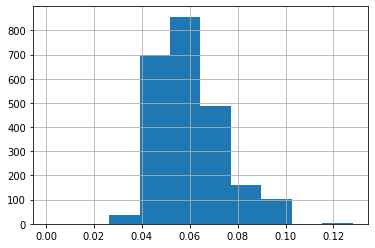

In [45]:
beer['abv'].hist()

In [46]:
beer['abv'].skew() #Valor 0 = Simetrica / positiva = Asimetrica a la derecha / negativa = Asimetrica a la izquierda

0.9584771340361395

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

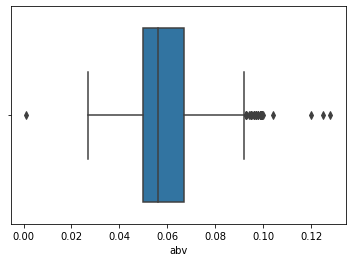

In [47]:
sns.boxplot(x = 'abv', data = beer)

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [52]:
beer.groupby('style')['abv'].mean().sort_values(ascending = False).head()

style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
Name: abv, dtype: float64

In [53]:
beer.groupby('style')['ibu'].mean().sort_values(ascending = False).head()

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
Name: ibu, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [60]:
df2 = pd.read_csv("datasets_breweries.csv")
df2.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [61]:
df2 = df2.rename(columns={"Unnamed: 0": "brewery_id",
                          "name": "brewery_name"})

In [62]:
df2.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 18
Junta los dos datasets que tienes

In [63]:
df3 = beer.merge(df2, on='brewery_id')
df3.head()

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas vervecerías hay?

In [65]:
len(df3['state'].unique())
len(df3['city'].unique())
len(df3['brewery_id'].unique())
len(df3['brewery_name'].unique())

551

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [66]:
df3.groupby(['state','city']).aggregate(['mean','min','median','max'])['abv']

mean    min  median    max
state city                                      
 AK   Anchorage   0.054200  0.048  0.0520  0.063
      Juneau      0.053000  0.053  0.0530  0.053
      Soldotna    0.058500  0.050  0.0580  0.068
      Talkeetna   0.059500  0.056  0.0585  0.065
 AL   Birmingham  0.065400  0.056  0.0600  0.093
...                    ...    ...     ...    ...
 WI   Wilson      0.055000  0.055  0.0550  0.055
 WV   Lewisburg   0.062000  0.057  0.0620  0.067
 WY   Jackson     0.054857  0.050  0.0520  0.068
      Pinedale    0.061000  0.050  0.0610  0.072
      Sheridan    0.052833  0.046  0.0480  0.070

[401 rows x 4 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [80]:
bitter =df3[df3['state'] == ' IN']
bitter.sort_values(['ibu'], ascending = False)[['name','ibu','state']].head()

,name,ibu,state
479,Hopkick Dropkick,115.0,IN
2191,Overlord Imperial IPA,115.0,IN
811,Half Cycle IPA,104.0,IN
2062,Isis,91.0,IN
2189,Csar,90.0,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [83]:
df3.groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

In [88]:
def filter_fc(x):
    return  x['abv'].min() > 0.07


In [89]:
df3.groupby('brewery_name').filter(filter_fc)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
212,0.088,108.0,1806,Hoptopus Double IPA,American Double / Imperial IPA,306,16.0,Beach Brewing Company,Virginia Beach,VA
275,0.072,75.0,2620,Saucy Intruder,Rye Beer,18,16.0,Black Acre Brewing Co.,Indianapolis,IN
309,0.080,80.0,1812,Quarter Mile Double IPA,American Double / Imperial IPA,304,12.0,Blue Hills Brewery,Canton,MA
354,0.071,16.0,2062,Noche Dulce,American Porter,231,16.0,Borderlands Brewing Company,Tucson,AZ
594,0.089,126.0,2440,Bay of Bengal Double IPA (2014),American Double / Imperial IPA,99,12.0,Christian Moerlein Brewing Company,Cincinnati,OH
690,0.072,NaN,1623,Lift Off IPA,American IPA,358,16.0,Daredevil Brewing Company,Shelbyville,IN
1142,0.071,NaN,2163,Sucha Much IPA,American IPA,208,12.0,Kalona Brewing Company,Kalona,IA
1143,0.075,24.0,2162,Lewbricator Wheat Dopplebock,Doppelbock,208,12.0,Kalona Brewing Company,Kalona,IA
1186,0.080,NaN,1637,Bellingham Beer Week 2013 Collaboration,Belgian Strong Dark Ale,354,16.0,Kulshan Brewery,Bellingham,WA
1409,0.082,NaN,1952,Train Wreck,American Amber / Red Ale,260,16.0,Mountain Town Brewing Company,Mount Pleasant,MI


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [91]:
mead_tot_ibu = df3['ibu'].mean()
mead_tot_ibu

42.71316725978647

In [92]:
def filter_fc(x):
    return x['ibu'].mean() > mead_tot_ibu

df3.groupby('state').filter(filter_fc)

TypeError: filter function returned a Series, but expected a scalar bool